In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns

import math

# Load file

In [22]:
data = pd.read_csv('/content/drive/MyDrive/summer_project_2021/airbnb/listings.csv')

In [23]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,28,4,145,2019-12-17,2.26,1,278
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.76,10,0
3,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365
4,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,101,1,161,2020-01-09,1.25,1,329


In [24]:
data.shape
# 18605, 16

(18605, 16)

In [25]:
# 1
len(set(data.id))
# id is not useful in this case, it is just unique number for each variable

18605

In [26]:
# 2
len(set(data.name))
# useless

18028

In [27]:
# 3
len(set(data.host_id))
# useless

11983

In [28]:
# 4
len(set(data.host_name))
# useless

5013

In [29]:
# 5
# len(set(data.neighbourhood_group))
# set(data.neighbourhood_group)
# useless attribute

In [30]:
# 6
len(set(data.neighbourhood))

30

In [31]:
# 7&8
# len(set(data.latitude))
# len(set(data.longitude))
# not interested in

In [32]:
# 9
len(set(data.room_type))

4

In [33]:
# 10
len(set(data.price))

725

In [34]:
# 11
len(set(data.minimum_nights))

80

In [35]:
# 12
len(set(data.number_of_reviews))

364

In [36]:
# 13
len(set(data.last_review))
# need to split this column to year and month

2011

In [37]:
# 14
len(set(data.reviews_per_month))

4973

In [38]:
# 15
len(set(data.calculated_host_listings_count))

51

In [39]:
# 16
len(set(data.availability_365))

366

In [40]:
# col_names = []
# for col in data.columns:
#     col_names += [col]
# col_names

# preprocessing

## last_review split to year_review and month_review

In [41]:
data.last_review

0        2015-09-12
1        2019-12-17
2        2016-01-25
3        2012-01-27
4        2020-01-09
            ...    
18600           NaN
18601           NaN
18602           NaN
18603           NaN
18604           NaN
Name: last_review, Length: 18605, dtype: object

In [42]:
new_data = data[['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'last_review', 'availability_365']]
# new_data.head()

In [43]:
# new_data.head(20)

In [44]:
# year
new_data['year_review'] = new_data.last_review
new_data.year_review = new_data.year_review.fillna('0')
for i in range(len(data)):
  new_data['year_review'][i] = int(new_data.year_review[i].split('-')[0])
# for i in range(len(data)):
#   new_data['year_review'][i] = new_data.last_review[i].split('-')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [45]:
set(new_data.year_review)

{0, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [46]:
# month
new_data['month_review'] = new_data.last_review
new_data.month_review = new_data.month_review.fillna('0000-0')

for i in range(len(data)):
  new_data['month_review'][i] = int(new_data.month_review[i].split('-')[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [47]:
set(new_data.month_review)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [48]:
new_data[['last_review','year_review','month_review']]
# new_data.head()

,last_review,year_review,month_review
0,2015-09-12,2015,9
1,2019-12-17,2019,12
2,2016-01-25,2016,1
3,2012-01-27,2012,1
4,2020-01-09,2020,1
...,...,...,...
18600,NaN,0,0
18601,NaN,0,0
18602,NaN,0,0
18603,NaN,0,0


# user case

## Price
1. is there any relationship between the neighbourhood and price?

2. is there any relationship between the room_type and price?

3. is there any relationship between the minimum_nights and price?

4. will be price of the room changed in different years? (relationship between last_review and price)

5. will the availability affect the price?

### 1. is there any relationship between the neighbourhood and price?

In [49]:
new_data.price

0          60
1          28
2          95
3        1000
4         101
         ... 
18600     100
18601      70
18602     182
18603     115
18604     116
Name: price, Length: 18605, dtype: int64

In [130]:
new_data.neighbourhood

AttributeError: ignored

In [141]:
neighbourhood = new_data.neighbourhood.value_counts().to_frame()
neighbourhood.reset_index(level=0, inplace=True)
neighbourhood

,index,neighbourhood
0,Melbourne,5430
1,Port Phillip,2256
2,Yarra,1432
3,Stonnington,1277
4,Yarra Ranges,793
5,Moreland,780
6,Monash,589
7,Darebin,578
8,Boroondara,534
9,Glen Eira,519


([<matplotlib.patches.Wedge at 0x7f4ac208c250>,
 [Text(0.6691155350380651, 0.8730889993412607, 'Melbourne'),
  Text(-0.6603843080553313, 0.8797116377963187, 'Port Phillip'),
  Text(-1.0495245002843911, 0.32939083670132496, 'Yarra'),
  Text(-1.0870960050238363, -0.16799486855620116, 'Stonnington'),
  Text(-0.9638299227671292, -0.530124400474747, 'Yarra Ranges'),
  Text(-0.7908722187561552, -0.7645398181911237, 'Moreland'),
  Text(-0.5946693487030652, -0.9254017320672534, 'Monash'),
  Text(-0.4019821168481915, -1.0239191265594403, 'Darebin'),
  Text(-0.20378352511025033, -1.0809589607814165, 'Boroondara'),
  Text(-0.009379880640505203, -1.0999600073817093, 'Glen Eira'),
  Text(0.18055746619502336, -1.0850801820147824, 'Whitehorse'),
  Text(0.3556017977350405, -1.0409358104357864, 'Wyndham'),
  Text(0.5061217630569893, -0.9766477158935483, 'Maribyrnong'),
  Text(0.6251181628258952, -0.9051117513904997, 'Bayside'),
  Text(0.7190954090996803, -0.8324072276306613, 'Moonee Valley'),
  Text(0.

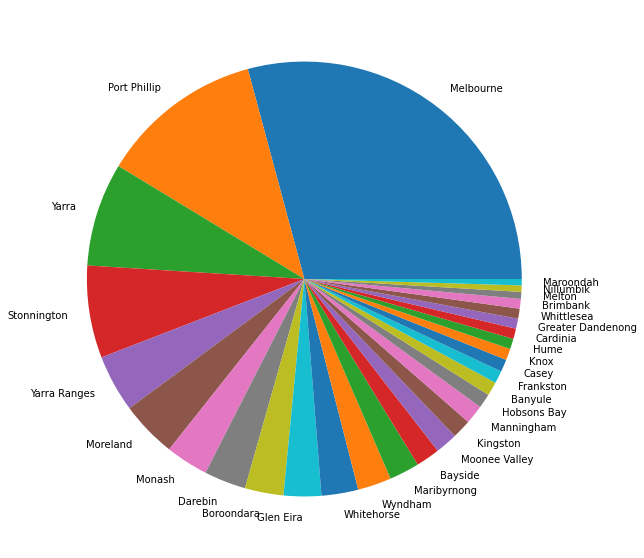

In [145]:
plt.figure(figsize=(20,10))
plt.pie(neighbourhood.neighbourhood, labels = neighbourhood['index'])

it can be seen that Melbourne has the most house/room in airbnb while Maroondah has the least.

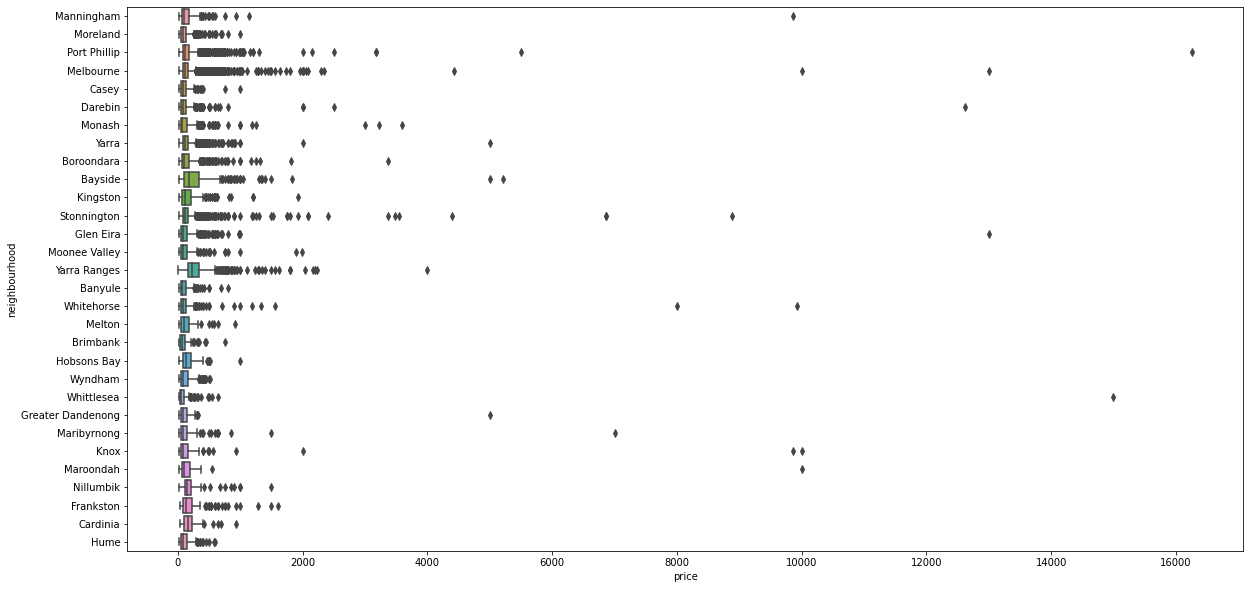

In [66]:
# fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
sns.boxplot(y='neighbourhood', x='price', data=new_data)

# sns.barplot(y=new_data.neighbourhood, x=new_data.price)

it can be seen that there are some outliers so that we can consume that the price over 4000 can be removed from the plot as they are not much and there is no any significant pattern can be found in these points

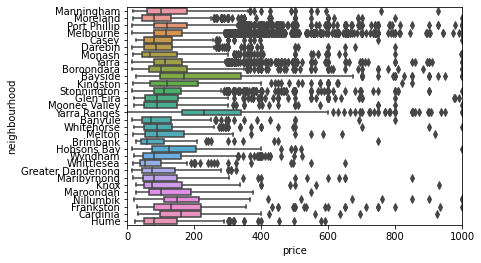

In [75]:
fig, ax = plt.subplots(1,1)
# plt.figure(figsize=(20,10))
sns.boxplot(y='neighbourhood', x='price', data=new_data, ax=ax)
ax.set_xlim(0,1000)
# the range of the x-axis can be changed in above code and different plots will show below
plt.show()


The plot looks much better than previous after removing the house/room prices that are too high. 

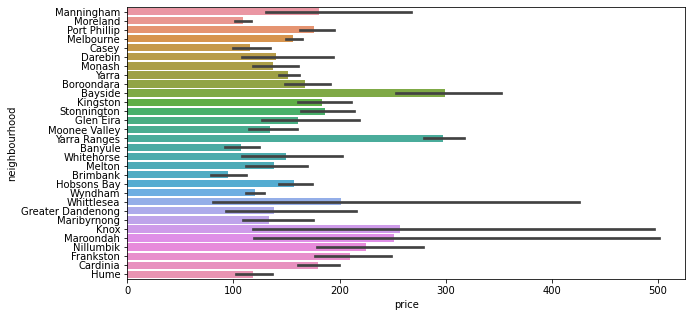

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(y=new_data.neighbourhood, x=new_data.price)

The relationship is more clear in carplot than that in boxplot. The range of the x-axis is automatically set to 0-500 and it can be checked that the price in Maroondah neighbourhood has the largest range which means it is the the neighbourhood that has the most different type of house/room options. In contrast, the price is the lowest in Brimbank. Other price ranges can be easily checked in above plot.

### 2. is there any relationship between the room_type and price?

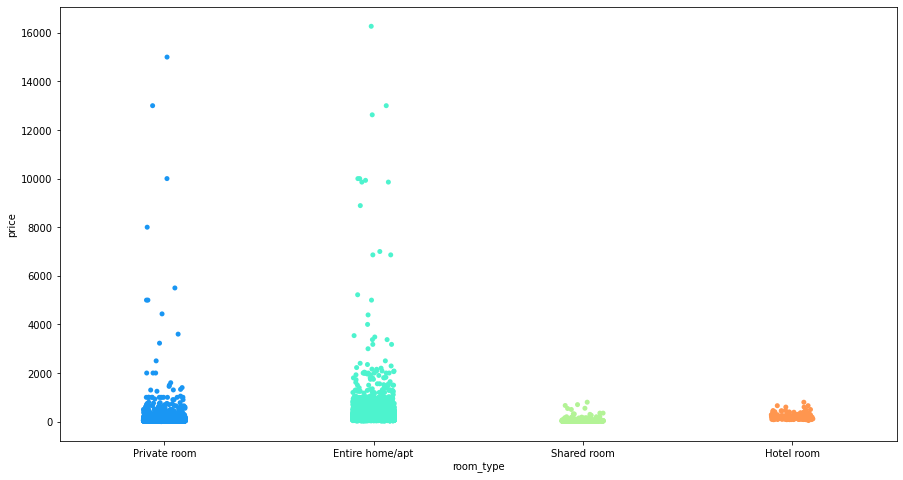

In [52]:
plt.figure(figsize=(15,8))
sns.stripplot(x='room_type',y='price',data=new_data, palette='rainbow')

It can be seen that the Private room and Entire home/apt has higher price ranges and more options than Shared room and Hotel room. As the first two types are mostly designed and built by personal house holder, they are more likely to have different locations and to satisfy customers personal preference than the rest of the two house/room types, thus these two types are more recommanded when customers have more budgets. But if customers have limit budgets, it will be more suitable to chose in shared rooms and hotel rooms during their vacations.

In [53]:
# set(new_data.minimum_nights)

### 3. is there any relationship between the minimum_nights and price?

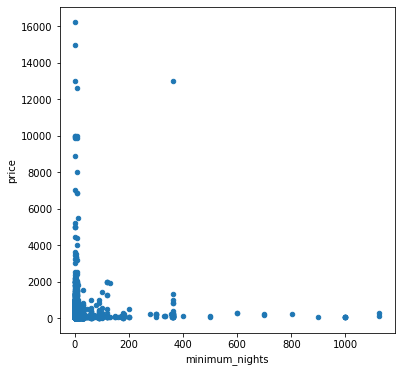

In [54]:
new_data.plot.scatter(x='minimum_nights', y='price', marker='o', figsize=(6,6))

some values mentioned the information that the minimum nights is over 100 days, these values might be the outliers or not, need to check with the data collecter.

And as there are some cases that have minimum_nights over one year (365 days), I am not sure the meaning of them

### 4. will be price of the room changed in different years? (relationship between last_review and price)

In [55]:
# set(new_data.year_review)

In [56]:
new_data1 = new_data[new_data.year_review != 0]

In [57]:
set(new_data1.year_review)

{2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [80]:
new_data1.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,last_review,availability_365,year_review,month_review
0,Manningham,Private room,60,1,4,0.03,1,2015-09-12,365,2015,9
1,Moreland,Private room,28,4,145,2.26,1,2019-12-17,278,2019,12
2,Port Phillip,Entire home/apt,95,3,42,0.76,10,2016-01-25,0,2016,1
3,Melbourne,Private room,1000,1,2,0.02,1,2012-01-27,365,2012,1
4,Casey,Entire home/apt,101,1,161,1.25,1,2020-01-09,329,2020,1


In [58]:
# year
# sns.swarmplot(x='room_type', y='price', data=new_data1, hue='year_review', dodge=True, palette='viridis')

In [118]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
new_data2 = new_data1[['month_review','year_review','price']]
new_data3 = new_data2.drop_duplicates().reset_index(drop=True)
# new_data3
new_data4 = new_data3.pivot("month_review", "year_review", "price")
# ax = sns.heatmap(new_data3)

ValueError: ignored

In [120]:
len(new_data3.index)

6917

! Error occurr

In [111]:
# set(new_data2)
# new_data3 = new_data2.drop_duplicates()
# new_data3.head()
# np.unique(new_data2, axis=0)

,month_review,year_review,price
0,9,2015,60
1,12,2019,28
2,1,2016,95
3,1,2012,1000
4,1,2020,101


In [121]:
# new_data1.plot.scatter(x='year_review', y='price', marker='o', figsize=(8,8))
# sns.heatmap(new_data2)
# set(np.isnan(new_data2.year_review))

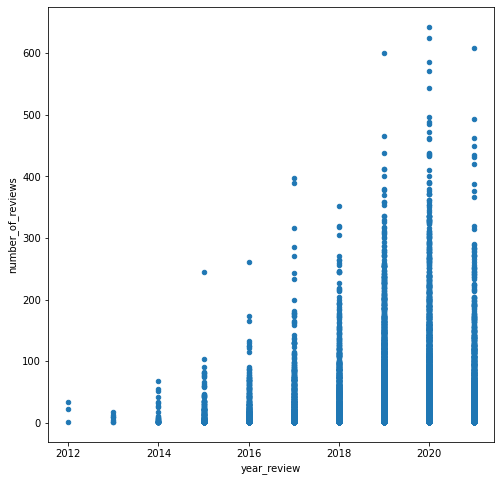

In [60]:
# year
new_data1.plot.scatter(x='year_review', y='number_of_reviews', marker='o', figsize=(8,8))

Airbnb is built in 2008, it is can be seen from above that with the time goes by, there are more reviews appear which means there are more and more people start to use this app.

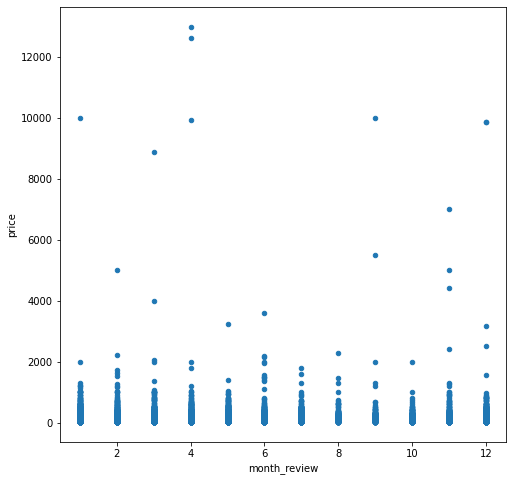

In [61]:
# month
new_data1.plot.scatter(x='month_review', y='price', marker='o', figsize=(8,8))

Price of the house/room is almost the same during whole year in each month, except there are some outliers in Jan, Mar, April, Sep, Nov and Dec.

In [122]:
# # # month
# # new_data1.plot.scatter(x='month_review', y='number_of_reviews', marker='o', figsize=(8,8))
# new_data1.plot.scatter(x='month_review', y='reviews_per_month', marker='o', figsize=(8,8))

### 5. will the availability affect the price?

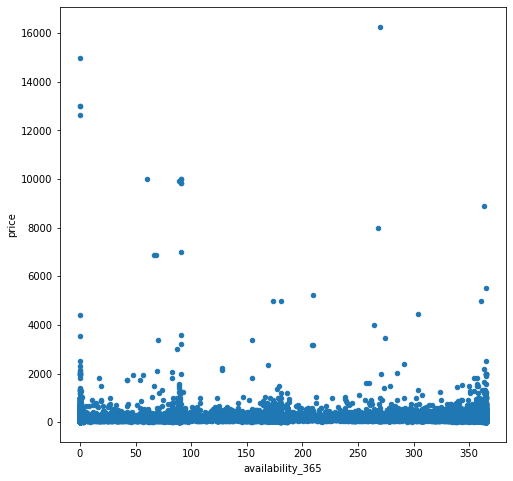

In [63]:
new_data.plot.scatter(x='availability_365', y='price', marker='o', figsize=(8,8))

there is not much relationship between the availibility and price

# test

## Geo
* get stucked as do not know how to build the geojson file (latitude, longitude and name are contained, only require the json file) 
* plotly plots cannot show in my computer and its all blank
* geojson cannot be used in google cobal, I have searched about it and still cannot fix it as I remove Anocando few months ago so I cannot use Jupyter

In [52]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,28,4,145,2019-12-17,2.26,1,278
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.76,10,0
3,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365
4,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,101,1,161,2020-01-09,1.25,1,329


In [51]:
new_data.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,last_review,availability_365,year_review,month_review
0,Manningham,Private room,60,1,4,0.03,1,2015-09-12,365,2015,9
1,Moreland,Private room,28,4,145,2.26,1,2019-12-17,278,2019,12
2,Port Phillip,Entire home/apt,95,3,42,0.76,10,2016-01-25,0,2016,1
3,Melbourne,Private room,1000,1,2,0.02,1,2012-01-27,365,2012,1
4,Casey,Entire home/apt,101,1,161,1.25,1,2020-01-09,329,2020,1


In [54]:

set(data.neighbourhood)
# len(set(data.neighbourhood))
# 30

30